In [22]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [23]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [24]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [25]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
june_temps = session.query(Measurement.date, Measurement.tobs).\
    filter(extract('month', Measurement.date ) == 6).all()
#print(june_temps)

In [26]:
#  3. Convert the June temperatures to a list.
june_temps = session.query(Measurement.tobs).\
    filter(extract('month', Measurement.date) == 6).all()
#print (june_temps)

In [27]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_temps_df = pd.DataFrame(june_temps)
#print(june_temps_df)

In [28]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_temps_df.describe()

,0
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [29]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
dec_temps = session.query(Measurement.date, Measurement.tobs).\
    filter(extract('month', Measurement.date ) == 12).all()
#print(dec_temps)

In [30]:
# 7. Convert the December temperatures to a list.
dec_temps = session.query(Measurement.tobs).\
    filter(extract('month', Measurement.date) == 12).all()
#print (dec_temps)

In [31]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_temps_df = pd.DataFrame(dec_temps)
#print(dec_temps_df)

In [32]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_temps_df.describe()

,0
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


## D3: Calculate Precipitation for June and December

In [33]:
# June Precipitation:
june_prcp = session.query(Measurement.date, Measurement.prcp).\
    filter(extract('month', Measurement.date ) == 6).all()
#print(june_prcp)

In [34]:
from operator import index


june_prcp_df = pd.DataFrame(june_prcp, columns=['date', 'precipitation'])
june_prcp_df.set_index(june_prcp_df['date'], inplace=True)

june_prcp_df = june_prcp_df.sort_index()
#print(june_prcp_df.to_string(index=False))


<AxesSubplot:title={'center':'June Precipitation by Year'}, xlabel='Years', ylabel='Precipication in mL'>

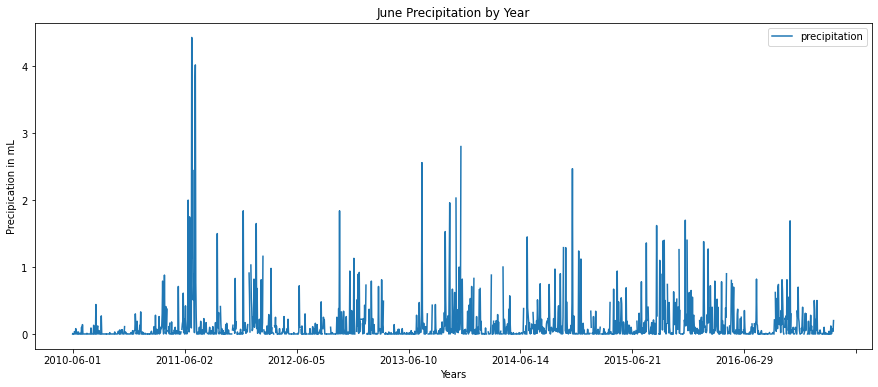

In [35]:
june_prcp_df.plot(title = 'June Precipitation by Year', figsize = (15,6),
 fontsize=10, ylabel= 'Precipication in mL', xlabel = 'Years')

In [40]:
june_prcp_df.describe()

,precipitation
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


In [36]:
# December Precipitation:
dec_prcp = session.query(Measurement.date, Measurement.prcp).\
    filter(extract('month', Measurement.date ) == 12).all()
#print(dec_prcp)

In [37]:
dec_prcp_df = pd.DataFrame(dec_prcp, columns=['date', 'precipitation'])
dec_prcp_df.set_index(dec_prcp_df['date'], inplace=True)
#print(dec_prcp_df.to_string(index=False))

dec_prcp_df = dec_prcp_df.sort_index()


<AxesSubplot:title={'center':'December Precipitation by Year'}, xlabel='Years', ylabel='Precipication in mL'>

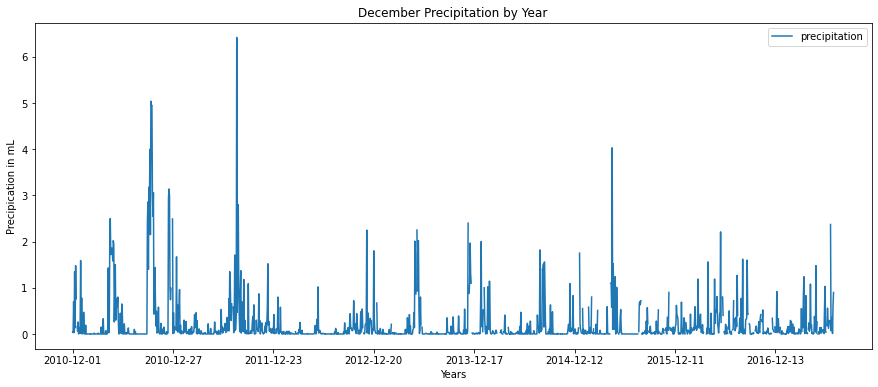

In [39]:
dec_prcp_df.plot(title = 'December Precipitation by Year', figsize = (15,6),
 fontsize=10, ylabel= 'Precipication in mL', xlabel = 'Years')

In [41]:
dec_prcp_df.describe()

,precipitation
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000
